# **`Data Collection`**

In [ ]:
 #INSTALL LIBRARIES
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached chembl_webresource_client-0.10.8-py3-none-any.whl (55 kB)
  Using cached requests_cache-0.7.5-py3-none-any.whl (39 kB)
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
  Using cached PyYAML-6.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (596 kB)
     |████████████████████████████████| 60 kB 3.5 MB/s 
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6349 sha256=bd9ccbedcd2a6c54b4d601b6dfef0877e00d443c2054c8852dababacc381031a
  Stored in directory: /root/.cache/pip/wheels/88/96/68/c2be18e7406804be2e593e1c37845f2dd20ac2ce1381ce40b0
Successfully built easydict


In [ ]:
#IMPORT USEFUL LIBRARIES
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [ ]:
#TARGET SEARCH FOR SERINE 
target = new_client.target
target_query = target.search('serine')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P09790', 'xref_name': None, 'xre...",Neisseria gonorrhoeae,IgA protease,11.0,False,CHEMBL3970,"[{'accession': 'P09790', 'component_descriptio...",SINGLE PROTEIN,485
1,[],Homo sapiens,"Serine hydroxymethyltransferase, cytosolic",11.0,False,CHEMBL1772927,"[{'accession': 'P34896', 'component_descriptio...",SINGLE PROTEIN,9606
2,"[{'xref_id': 'O15393', 'xref_name': None, 'xre...",Homo sapiens,Transmembrane protease serine 2,11.0,False,CHEMBL1795140,"[{'accession': 'O15393', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Homo sapiens,Serine protease hepsin,11.0,False,CHEMBL2079849,"[{'accession': 'P05981', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Homo sapiens,Retinoid-inducible serine carboxypeptidase,11.0,False,CHEMBL2189131,"[{'accession': 'Q9HB40', 'component_descriptio...",SINGLE PROTEIN,9606
...,...,...,...,...,...,...,...,...,...
483,[],Homo sapiens,Cyclin-dependent kinase 12/13,2.0,False,CHEMBL4630753,"[{'accession': 'Q14004', 'component_descriptio...",PROTEIN FAMILY,9606
484,[],Homo sapiens,Inhibitor of NF-kappa-B kinase (IKK),1.0,False,CHEMBL2111328,"[{'accession': 'O14920', 'component_descriptio...",PROTEIN COMPLEX,9606
485,[],Homo sapiens,PI3-kinase class I,1.0,False,CHEMBL3559703,"[{'accession': 'P27986', 'component_descriptio...",PROTEIN COMPLEX GROUP,9606
486,[],Homo sapiens,Ribosomal protein S6 kinase,1.0,False,CHEMBL3832633,"[{'accession': 'P51812', 'component_descriptio...",PROTEIN FAMILY,9606


In [ ]:
#Choosing a specific protein to work with
targets[(targets['organism'] == 'Homo sapiens') & (targets['target_type'] == 'SINGLE PROTEIN') & (targets['pref_name'] == 'Serine-protein kinase ATM')]

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
110,"[{'xref_id': 'Ataxia_telangiectasia_mutated', ...",Homo sapiens,Serine-protein kinase ATM,6.0,False,CHEMBL3797,"[{'accession': 'Q13315', 'component_descriptio...",SINGLE PROTEIN,9606


In [ ]:
#RETRIEVE THE BIOACTIVITY DATA FOR SERINE KINASE ATM

selected_target = targets.target_chembl_id[110]
selected_target

'CHEMBL3797'

In [ ]:
# Here, we will retrieve only bioactivity data for coronavirus 3C-like proteinase (CHEMBL3927) that are reported as IC values in nM (nanomolar) unit.
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
data = pd.DataFrame.from_dict(res)

In [ ]:
data.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1410289,[],CHEMBL832925,Inhibition of ATM kinase using rabbit polyclon...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine-protein kinase ATM,9606,None,None,IC50,uM,UO_0000065,None,100.0
1,None,1412179,[],CHEMBL828043,Inhibition of ATM kinase using rabbit polyclon...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine-protein kinase ATM,9606,None,None,IC50,uM,UO_0000065,None,100.0
2,None,1412286,[],CHEMBL832925,Inhibition of ATM kinase using rabbit polyclon...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine-protein kinase ATM,9606,None,None,IC50,uM,UO_0000065,None,100.0


In [ ]:
data.standard_type.unique()

array(['IC50'], dtype=object)

In [ ]:
#Finally we will save the resulting bioactivity data to a CSV file bioactivity_data.csv
data.to_csv('bioactivity_data.csv', index=False)

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive/', force_remount=True)

In [ ]:
# ! mkdir "/content/gdrive/My Drive/Colab Notebooks/data2"

In [ ]:
# ! cp bioactivity_data.csv "/content/gdrive/My Drive/Colab Notebooks/data"

In [ ]:
# ! ls -l "/content/gdrive/My Drive/Colab Notebooks/data"

In [ ]:
# ! ls

In [ ]:
# ! head bioactivity_data.csv

# **Feature Engineering**


In [ ]:
#HANDLE MISSING VALUES

data1 = data[data['standard_value'].notna()]
data1

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1410289,[],CHEMBL832925,Inhibition of ATM kinase using rabbit polyclon...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine-protein kinase ATM,9606,None,None,IC50,uM,UO_0000065,None,100.0
1,None,1412179,[],CHEMBL828043,Inhibition of ATM kinase using rabbit polyclon...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine-protein kinase ATM,9606,None,None,IC50,uM,UO_0000065,None,100.0
2,None,1412286,[],CHEMBL832925,Inhibition of ATM kinase using rabbit polyclon...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine-protein kinase ATM,9606,None,None,IC50,uM,UO_0000065,None,100.0
3,None,1412301,[],CHEMBL832925,Inhibition of ATM kinase using rabbit polyclon...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine-protein kinase ATM,9606,None,None,IC50,uM,UO_0000065,None,100.0
4,None,1459736,[],CHEMBL829467,Inhibition of Mutated in ataxia telangiectasia...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine-protein kinase ATM,9606,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,None,22990663,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4775108,Inhibition of human HeLa nuclear extract deriv...,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Serine-protein kinase ATM,9606,None,None,IC50,nM,None,None,12.9
490,None,22990664,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4775108,Inhibition of human HeLa nuclear extract deriv...,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Serine-protein kinase ATM,9606,None,None,IC50,uM,None,None,2.96
491,None,22990665,[],CHEMBL4775109,Inhibition of ATM (unknown origin),B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Serine-protein kinase ATM,9606,None,None,IC50,nM,None,None,6.3
492,None,22990670,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4775114,Inhibition of full length Flag-tagged ATM (unk...,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Serine-protein kinase ATM,9606,None,None,IC50,nM,None,None,12.9


In [ ]:
data1['standard_value']

0      100000.0
1      100000.0
2      100000.0
3      100000.0
4      100000.0
         ...   
489        12.9
490      2960.0
491         6.3
492        12.9
493        0.09
Name: standard_value, Length: 494, dtype: object

In [ ]:
#HISTOGRAM TO VISUALIZE THE DATA REPRESENTATION
data1['standard_value'] = data1['standard_value'].astype(float, errors = 'raise')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff56e4b8a50>]],
      dtype=object)

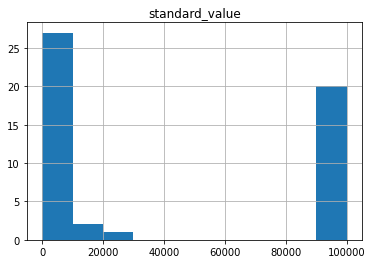

In [ ]:
data1[:50].hist(column='standard_value')

In [ ]:
#DATA PREPROCESSING

#LABELLING THE COMPOUNDS BEING ACTIVE INACTIVE OR INTERMEDIATE
#The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. 
#As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

bioactivity_class = []
for i in data1.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [ ]:
mol_cid = []
for i in data1.molecule_chembl_id:
  mol_cid.append(i)

In [ ]:
canonical_smiles = []
for i in data1.canonical_smiles:
  canonical_smiles.append(i)

In [ ]:
standard_value = []
for i in data1.standard_value:
  standard_value.append(i)

In [ ]:
#Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
data2 = pd.DataFrame(data_tuples, columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])

In [ ]:
data2

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL435507,CC1CN(c2cc(=O)c3ccc4ccccc4c3o2)CCO1,inactive,100000.00
1,CHEMBL98350,O=c1cc(N2CCOCC2)oc2c(-c3ccccc3)cccc12,inactive,100000.00
2,CHEMBL104468,O=c1cc(N2CCOCC2)oc2c1ccc1ccccc12,inactive,100000.00
3,CHEMBL179242,O=c1cc(N2CCOCC2)nc2c3ccccc3ccn12,inactive,100000.00
4,CHEMBL188678,O=c1cc(N2CCOCC2)oc2c(-c3cccc4c3sc3ccccc34)cccc12,inactive,100000.00
...,...,...,...,...
489,CHEMBL222102,O=c1cc(-c2cccc3c2Sc2ccccc2S3)oc(N2CCOCC2)c1,active,12.90
490,CHEMBL4789596,O=c1cc(-c2cccc3c2Sc2ccccc2S3)oc(N2CCCCC2)c1,intermediate,2960.00
491,CHEMBL4780892,C[C@H]1CC(NC(=O)Cc2ccc3c(c2)Sc2cccc(-c4cc(=O)c...,active,6.30
492,CHEMBL2143829,COc1cc2ncnc(-n3nc(-c4ccccn4)nc3N)c2cc1OC,active,12.90


In [ ]:
data2.to_csv('bioactivity_preprocessed_data.csv', index=False)

In [ ]:
! ls -l

total 134088
-rw-r--r-- 1 root root   416228 Jun  3 01:09 bioactivity_data.csv
-rw-r--r-- 1 root root    40933 Jun  3 01:09 bioactivity_preprocessed_data.csv
drwxr-xr-x 3 root root     4096 Jun  3 01:07 __MACOSX
-rw-r--r-- 1 root root      122 Jun  3 01:04 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      120 Jun  3 01:04 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      132 Jun  3 01:04 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      128 Jun  3 01:04 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      121 Jun  3 01:04 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root    28624 Jun  3 01:04 molecule.smi
drwxrwxr-x 4 root root     4096 Jun  3 01:07 PaDEL-Descriptor
-rw-r--r-- 1 root root 25768637 Jun  3 01:04 padel.zip
-rw-r--r-- 1 root root 25768637 Jun  3 01:07 padel.zip.1
-rw-r--r-- 1 root root    13612 Jun  3 01:04 plot_bioactivity_class.pdf
-rw-r--r-- 1 root root    15697 Jun  3 01:04 plot_ic

In [ ]:
! ls "/content/gdrive/My Drive/Colab Notebooks/data"

ls: cannot access '/content/gdrive/My Drive/Colab Notebooks/data': No such file or directory


In [ ]:
! pip3 install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Exploratory Data Analysis**

In [ ]:
import pandas as pd
df = pd.read_csv('bioactivity_preprocessed_data.csv')

# **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

**The Lipinski's Rule stated the following:**

1.   Molecular weight < 500 Dalton
2.   Octanol-water partition coefficient (LogP) < 5
1.   Hydrogen bond donors < 5
2.   Hydrogen bond acceptors < 10

In [ ]:
#install rdkit and conda
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-06-03 01:09:50--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M  81.2MB/s    in 1.0s    

2022-06-03 01:09:51 (81.2 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | / - \ | / - \ | failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: | / - \ | / - \ | / - 

In [ ]:
#CALCULATE LIPINSKI DESCRIPTORS

import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipsinki = lipinski(df.canonical_smiles)

In [ ]:
df_lipsinki

,MW,LogP,NumHDonors,NumHAcceptors
0,295.338,3.1713,0.0,4.0
1,307.349,3.2966,0.0,4.0
2,281.311,2.7828,0.0,4.0
3,281.315,1.6843,0.0,5.0
4,413.498,5.6645,0.0,5.0
...,...,...,...,...
489,395.505,4.7592,0.0,6.0
490,393.533,5.9129,0.0,5.0
491,564.729,5.3739,1.0,8.0
492,349.354,1.8719,1.0,9.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL435507,CC1CN(c2cc(=O)c3ccc4ccccc4c3o2)CCO1,inactive,100000.00
1,CHEMBL98350,O=c1cc(N2CCOCC2)oc2c(-c3ccccc3)cccc12,inactive,100000.00
2,CHEMBL104468,O=c1cc(N2CCOCC2)oc2c1ccc1ccccc12,inactive,100000.00
3,CHEMBL179242,O=c1cc(N2CCOCC2)nc2c3ccccc3ccn12,inactive,100000.00
4,CHEMBL188678,O=c1cc(N2CCOCC2)oc2c(-c3cccc4c3sc3ccccc34)cccc12,inactive,100000.00
...,...,...,...,...
489,CHEMBL222102,O=c1cc(-c2cccc3c2Sc2ccccc2S3)oc(N2CCOCC2)c1,active,12.90
490,CHEMBL4789596,O=c1cc(-c2cccc3c2Sc2ccccc2S3)oc(N2CCCCC2)c1,intermediate,2960.00
491,CHEMBL4780892,C[C@H]1CC(NC(=O)Cc2ccc3c(c2)Sc2cccc(-c4cc(=O)c...,active,6.30
492,CHEMBL2143829,COc1cc2ncnc(-n3nc(-c4ccccn4)nc3N)c2cc1OC,active,12.90


In [ ]:
df_combined = pd.concat([df,df_lipsinki], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL435507,CC1CN(c2cc(=O)c3ccc4ccccc4c3o2)CCO1,inactive,100000.00,295.338,3.1713,0.0,4.0
1,CHEMBL98350,O=c1cc(N2CCOCC2)oc2c(-c3ccccc3)cccc12,inactive,100000.00,307.349,3.2966,0.0,4.0
2,CHEMBL104468,O=c1cc(N2CCOCC2)oc2c1ccc1ccccc12,inactive,100000.00,281.311,2.7828,0.0,4.0
3,CHEMBL179242,O=c1cc(N2CCOCC2)nc2c3ccccc3ccn12,inactive,100000.00,281.315,1.6843,0.0,5.0
4,CHEMBL188678,O=c1cc(N2CCOCC2)oc2c(-c3cccc4c3sc3ccccc34)cccc12,inactive,100000.00,413.498,5.6645,0.0,5.0
...,...,...,...,...,...,...,...,...
489,CHEMBL222102,O=c1cc(-c2cccc3c2Sc2ccccc2S3)oc(N2CCOCC2)c1,active,12.90,395.505,4.7592,0.0,6.0
490,CHEMBL4789596,O=c1cc(-c2cccc3c2Sc2ccccc2S3)oc(N2CCCCC2)c1,intermediate,2960.00,393.533,5.9129,0.0,5.0
491,CHEMBL4780892,C[C@H]1CC(NC(=O)Cc2ccc3c(c2)Sc2cccc(-c4cc(=O)c...,active,6.30,564.729,5.3739,1.0,8.0
492,CHEMBL2143829,COc1cc2ncnc(-n3nc(-c4ccccn4)nc3N)c2cc1OC,active,12.90,349.354,1.8719,1.0,9.0


# **Convert IC50 to pIC50**
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [ ]:
def pIC50(input):
  pIC50 = []

  for i in input['standard_value_norm']:
    molar = i * (10 ** -9)
    pIC50.append(-np.log10(molar))

  input['pIC50'] = pIC50
  x = input.drop('standard_value_norm', 1)

  return x


In [ ]:
df_combined.standard_value.describe()

count    4.940000e+02
mean     1.439497e+04
std      8.132118e+04
min      4.000000e-02
25%      3.000000e+00
50%      3.715000e+02
75%      1.000000e+04
max      1.740000e+06
Name: standard_value, dtype: float64

In [ ]:
def norm_value(input):
  norm = []

  for i in input['standard_value']:
     if i > 100000000:
          i = 100000000
     norm.append(i)

  input['standard_value_norm'] = norm
  x = input.drop('standard_value', 1)
        
  return x

In [ ]:
#We will first apply the norm_value() function so that the values in the standard_value column is normalized.
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL435507,CC1CN(c2cc(=O)c3ccc4ccccc4c3o2)CCO1,inactive,295.338,3.1713,0.0,4.0,100000.00
1,CHEMBL98350,O=c1cc(N2CCOCC2)oc2c(-c3ccccc3)cccc12,inactive,307.349,3.2966,0.0,4.0,100000.00
2,CHEMBL104468,O=c1cc(N2CCOCC2)oc2c1ccc1ccccc12,inactive,281.311,2.7828,0.0,4.0,100000.00
3,CHEMBL179242,O=c1cc(N2CCOCC2)nc2c3ccccc3ccn12,inactive,281.315,1.6843,0.0,5.0,100000.00
4,CHEMBL188678,O=c1cc(N2CCOCC2)oc2c(-c3cccc4c3sc3ccccc34)cccc12,inactive,413.498,5.6645,0.0,5.0,100000.00
...,...,...,...,...,...,...,...,...
489,CHEMBL222102,O=c1cc(-c2cccc3c2Sc2ccccc2S3)oc(N2CCOCC2)c1,active,395.505,4.7592,0.0,6.0,12.90
490,CHEMBL4789596,O=c1cc(-c2cccc3c2Sc2ccccc2S3)oc(N2CCCCC2)c1,intermediate,393.533,5.9129,0.0,5.0,2960.00
491,CHEMBL4780892,C[C@H]1CC(NC(=O)Cc2ccc3c(c2)Sc2cccc(-c4cc(=O)c...,active,564.729,5.3739,1.0,8.0,6.30
492,CHEMBL2143829,COc1cc2ncnc(-n3nc(-c4ccccn4)nc3N)c2cc1OC,active,349.354,1.8719,1.0,9.0,12.90


In [ ]:
df_norm.standard_value_norm.describe()

count    4.940000e+02
mean     1.439497e+04
std      8.132118e+04
min      4.000000e-02
25%      3.000000e+00
50%      3.715000e+02
75%      1.000000e+04
max      1.740000e+06
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL435507,CC1CN(c2cc(=O)c3ccc4ccccc4c3o2)CCO1,inactive,295.338,3.1713,0.0,4.0,4.000000
1,CHEMBL98350,O=c1cc(N2CCOCC2)oc2c(-c3ccccc3)cccc12,inactive,307.349,3.2966,0.0,4.0,4.000000
2,CHEMBL104468,O=c1cc(N2CCOCC2)oc2c1ccc1ccccc12,inactive,281.311,2.7828,0.0,4.0,4.000000
3,CHEMBL179242,O=c1cc(N2CCOCC2)nc2c3ccccc3ccn12,inactive,281.315,1.6843,0.0,5.0,4.000000
4,CHEMBL188678,O=c1cc(N2CCOCC2)oc2c(-c3cccc4c3sc3ccccc34)cccc12,inactive,413.498,5.6645,0.0,5.0,4.000000
...,...,...,...,...,...,...,...,...
489,CHEMBL222102,O=c1cc(-c2cccc3c2Sc2ccccc2S3)oc(N2CCOCC2)c1,active,395.505,4.7592,0.0,6.0,7.889410
490,CHEMBL4789596,O=c1cc(-c2cccc3c2Sc2ccccc2S3)oc(N2CCCCC2)c1,intermediate,393.533,5.9129,0.0,5.0,5.528708
491,CHEMBL4780892,C[C@H]1CC(NC(=O)Cc2ccc3c(c2)Sc2cccc(-c4cc(=O)c...,active,564.729,5.3739,1.0,8.0,8.200659
492,CHEMBL2143829,COc1cc2ncnc(-n3nc(-c4ccccn4)nc3N)c2cc1OC,active,349.354,1.8719,1.0,9.0,7.889410


In [ ]:
df_final.pIC50.describe()

count    494.000000
mean       6.666207
std        1.832559
min        2.759451
25%        5.000000
50%        6.430045
75%        8.522879
max       10.397940
Name: pIC50, dtype: float64

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL435507,CC1CN(c2cc(=O)c3ccc4ccccc4c3o2)CCO1,inactive,295.338,3.1713,0.0,4.0,4.000000
1,CHEMBL98350,O=c1cc(N2CCOCC2)oc2c(-c3ccccc3)cccc12,inactive,307.349,3.2966,0.0,4.0,4.000000
2,CHEMBL104468,O=c1cc(N2CCOCC2)oc2c1ccc1ccccc12,inactive,281.311,2.7828,0.0,4.0,4.000000
3,CHEMBL179242,O=c1cc(N2CCOCC2)nc2c3ccccc3ccn12,inactive,281.315,1.6843,0.0,5.0,4.000000
4,CHEMBL188678,O=c1cc(N2CCOCC2)oc2c(-c3cccc4c3sc3ccccc34)cccc12,inactive,413.498,5.6645,0.0,5.0,4.000000
...,...,...,...,...,...,...,...,...
488,CHEMBL4783046,COC[C@H]1c2cc(OC)ccc2Sc2c(-c3cc(=O)cc(N4CCOCC4...,active,451.544,4.3949,0.0,7.0,6.229148
489,CHEMBL222102,O=c1cc(-c2cccc3c2Sc2ccccc2S3)oc(N2CCOCC2)c1,active,395.505,4.7592,0.0,6.0,7.889410
491,CHEMBL4780892,C[C@H]1CC(NC(=O)Cc2ccc3c(c2)Sc2cccc(-c4cc(=O)c...,active,564.729,5.3739,1.0,8.0,8.200659
492,CHEMBL2143829,COc1cc2ncnc(-n3nc(-c4ccccn4)nc3N)c2cc1OC,active,349.354,1.8719,1.0,9.0,7.889410


**Exploratory data analysis**

In [ ]:
#IMPORT VISUALIZATION LIBRARIES
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt


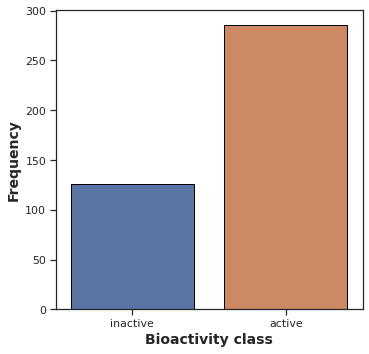

In [ ]:
#Frequency plot of the 2 bioactivity classes
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

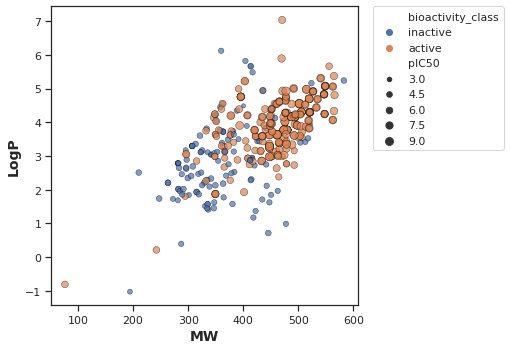

In [ ]:
#Scatter plot of MW versus LogP
#It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

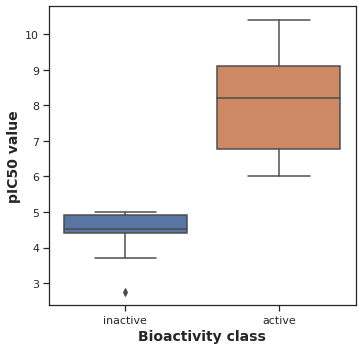

In [ ]:
#Box plots - pIC50 value
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [ ]:
 #MANWHITNEY U TEST TO COMPARE THE TWO INDEPENDENT LABELS
 
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

def mannwhitney(descriptor, verbose=False):
  # seed the random number generator
  seed(1)

  # actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

  # compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

  # interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,3.039877e-59,0.05,Different distribution (reject H0)


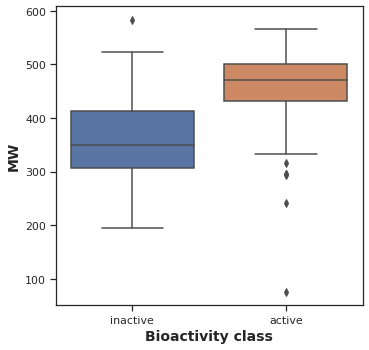

In [ ]:
#BOX PLOT FOR MOLECULAR WEIGHT
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,4938.0,3.748427e-32,0.05,Different distribution (reject H0)


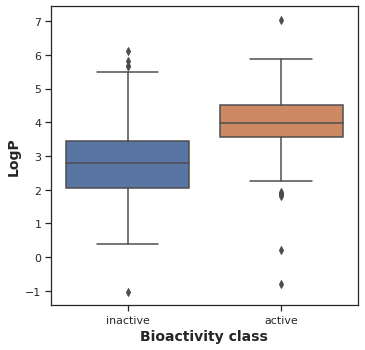

In [ ]:
#BOX PLOT FOR logp
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,7126.5,6.879888e-23,0.05,Different distribution (reject H0)


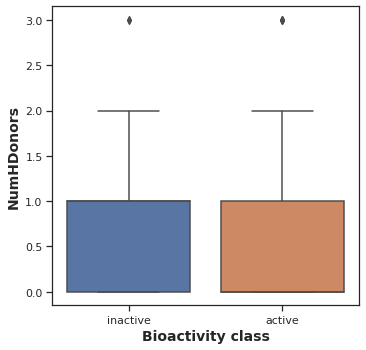

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,15438.5,0.005567,0.05,Different distribution (reject H0)


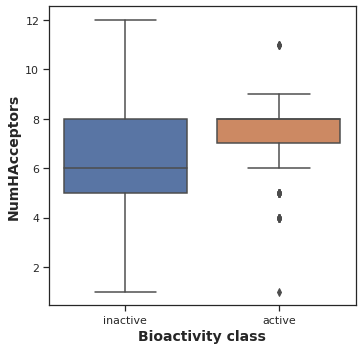

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,13249.0,0.000005,0.05,Different distribution (reject H0)


# **Interpretation of Statistical Results**
Box Plots
pIC50 values
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

**Lipinski's descriptors**
Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), all the 4 descriptors (MW, NumHDonors and NumHAcceptors) shows statistically significant difference between actives and inactives.

In [ ]:
# ! zip -r results.zip . -i *.csv *.pdf

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive/', force_remount=True)

In [ ]:
# ! mkdir "/content/gdrive/My Drive/Colab Notebooks/reports"

In [ ]:
# ! cp results.zip "/content/gdrive/My Drive/Colab Notebooks/reports"

# **Download PaDEL-Descriptor**

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh!

--2022-06-03 01:10:45--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-06-03 01:10:45--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.2’

padel.zip.2         100%[===================>]  24.57M   160MB/s    in 0.2s    

2022-06-03 01:10:45 (160 MB/s) - ‘padel.zip.2’ saved [25768637/25768637]

--2022-06-03 01:10:45--  https://gi

In [ ]:
! unzip padel.zip

Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config 

In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df2_selection = df_2class[selection]
df2_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

CC1CN(c2cc(=O)c3ccc4ccccc4c3o2)CCO1	CHEMBL435507
O=c1cc(N2CCOCC2)oc2c(-c3ccccc3)cccc12	CHEMBL98350
O=c1cc(N2CCOCC2)oc2c1ccc1ccccc12	CHEMBL104468
O=c1cc(N2CCOCC2)nc2c3ccccc3ccn12	CHEMBL179242
O=c1cc(N2CCOCC2)oc2c(-c3cccc4c3sc3ccccc34)cccc12	CHEMBL188678


In [ ]:
! cat molecule.smi | wc -l

412


In [ ]:
#CALCULATE FINGERPRINT DESCRIPTORS

! cat padel.sh

cat: padel.sh: No such file or directory


In [ ]:
! bash padel.sh

bash: padel.sh: No such file or directory


In [ ]:
! ls -l

total 242320
-rw-r--r-- 1 root root   416228 Jun  3 01:09 bioactivity_data.csv
-rw-r--r-- 1 root root    40933 Jun  3 01:09 bioactivity_preprocessed_data.csv
drwxr-xr-x 3 root root     4096 Jun  3 01:11 __MACOSX
-rw-r--r-- 1 root root      122 Jun  3 01:10 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      120 Jun  3 01:10 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      132 Jun  3 01:10 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      128 Jun  3 01:10 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      121 Jun  3 01:10 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh.1
-rw-r--r-- 1 root root    28624 Jun  3 01:11 molecule.smi
drwxrwxr-x 4 root root     4096 Jun  3 01:11 PaDEL-Descriptor
-rw-r--r-- 1 root root 25768637 Jun  3 01:04 padel.zip
-rw-r--r-- 1 root root 25768637 Jun  3 01:07 padel.zip.1
-rw-r--r-- 1 root root 25768637 Jun  3 

In [77]:
df3_X = pd.read_csv('descriptors_output.csv')

In [78]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL435507,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL98350,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL179242,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL104468,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL98350,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,CHEMBL4783046,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408,CHEMBL222102,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
409,CHEMBL2143829,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
410,CHEMBL4780892,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Preparing the X and Y Data **Matrices**

In [79]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
408,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
409,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
410,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df3_Y = df_2class['pIC50']
df3_Y

0       4.000000
1       4.000000
2       4.000000
3       4.000000
4       4.000000
         ...    
488     6.229148
489     7.889410
491     8.200659
492     7.889410
493    10.045757
Name: pIC50, Length: 412, dtype: float64

In [81]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.229148
489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.889410
491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.200659
492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.889410


In [82]:

dataset3.to_csv('serine-kinase-atm.csv', index=False)

In [84]:
import pandas as pd
df = pd.read_csv('serine-kinase-atm.csv')

In [85]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [86]:
df.shape

(490, 882)

In [87]:
df.dropna(inplace=True)

In [88]:
df.shape

(334, 882)

In [89]:
# Input features

X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
409,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
410,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
# OUTPUT FEATURES

Y = df.pIC50
Y

0      4.000000
1      4.000000
2      4.000000
3      4.000000
4      4.000000
         ...   
407    7.698970
408    8.000000
409    9.221849
410    9.221849
411    9.301030
Name: pIC50, Length: 334, dtype: float64

In [91]:
X.shape

(334, 881)

In [92]:
Y.shape

(334,)

In [93]:
# REMOVE LOW VARIANCE FEATURES  

from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [94]:
X.shape

(334, 149)

# **MODEL BUILDING**

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [96]:
X_train.shape, Y_train.shape

((267, 149), (267,))

In [97]:
X_test.shape, Y_test.shape

((67, 149), (67,))

In [98]:
#BUILDING A REGRESSION MODEL USING RANDOM FOREST
import numpy as np
np.random.seed(200)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)

RandomForestRegressor()

In [99]:
Y_pred = model.predict(X_train)

In [100]:
from sklearn import metrics
print('R^2:',metrics.r2_score(Y_train, Y_pred))

R^2: 0.7108818176086349


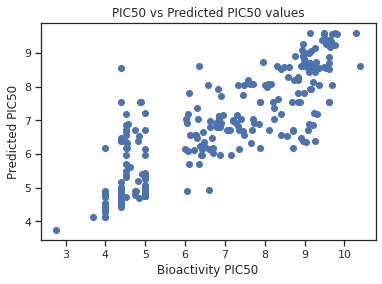

In [101]:
plt.scatter(Y_train, Y_pred)
plt.xlabel("Bioactivity PIC50")
plt.ylabel("Predicted PIC50")
plt.title("PIC50 vs Predicted PIC50 values")
plt.savefig('training-evaluation-bioactivity.pdf')
plt.show()

In [102]:
# Predicting Test data with the model
y_test_pred = model.predict(X_test)

In [103]:
acc_rf = metrics.r2_score(Y_test, y_test_pred)
print('R^2:', acc_rf)

R^2: 0.0014792078904591888


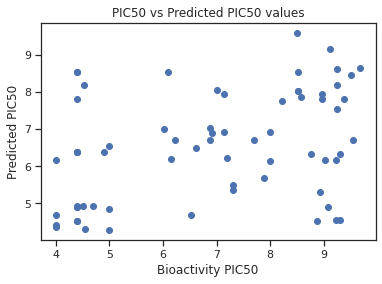

In [104]:
plt.scatter(Y_test, y_test_pred)
plt.xlabel("Bioactivity PIC50")
plt.ylabel("Predicted PIC50")
plt.title("PIC50 vs Predicted PIC50 values")
plt.savefig('testing-evaluation-bioactivity.pdf')
plt.show()

In [105]:
! cp testing-evaluation-bioactivity.pdf training-evaluation-bioactivity.pdf "/content/gdrive/My Drive/Colab Notebooks/reports"

cp: target '/content/gdrive/My Drive/Colab Notebooks/reports' is not a directory


**Comparing different models**

In [106]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 245 kB/s 
     |████████████████████████████████| 127.6 MB 16 kB/s 
     |████████████████████████████████| 248 kB 28.4 MB/s 
     |████████████████████████████████| 25.9 MB 1.8 MB/s 
     |████████████████████████████████| 269 kB 51.9 MB/s 
     |████████████████████████████████| 1.2 MB 42.8 MB/s 
     |████████████████████████████████| 6.8 MB 22.8 MB/s 
     |████████████████████████████████| 82 kB 917 kB/s 
     |████████████████████████████████| 14.5 MB 683 kB/s 
     |████████████████████████████████| 72 kB 788 kB/s 
     |████████████████████████████████| 302 kB 42.3 MB/s 
     |████████████████████████████████| 51 kB 314 kB/s 
     |████████████████████████████████| 98 kB 7.1 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=393700 sha256=767479c40e1969e15257197892cd6f0cddbfb47643138a44984e926563

In [107]:
import lazypredict

In [111]:
from lazypredict.Supervised import LazyRegressor

In [112]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 95%|█████████▌| 40/42 [00:14<00:00,  5.73it/s]

[01:22:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:15<00:00,  2.78it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 95%|█████████▌| 40/42 [00:14<00:00,  5.05it/s]

[01:22:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:15<00:00,  2.80it/s]


In [113]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.40,0.74,1.02,0.10
ExtraTreesRegressor,0.40,0.74,1.02,0.39
DecisionTreeRegressor,0.40,0.74,1.02,0.07
ExtraTreeRegressor,0.40,0.74,1.02,0.06
RandomForestRegressor,0.34,0.71,1.07,0.39
BaggingRegressor,0.30,0.69,1.11,0.07
GradientBoostingRegressor,0.21,0.65,1.17,0.23
XGBRegressor,0.19,0.65,1.18,0.20
LGBMRegressor,0.15,0.62,1.22,0.11


In [114]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,894900685160812827497377355005952.00,-1125405407096173650534658037776384.00,66346897888681728.00,0.09
TransformedTargetRegressor,8388656426943276470239232.00,-10549370961155938672705536.00,6423613545723.98,0.06
LinearRegression,8388656426943276470239232.00,-10549370961155938672705536.00,6423613545723.98,0.04
KernelRidge,11.91,-12.72,7.33,0.03
GaussianProcessRegressor,4.94,-3.96,4.40,0.07
RANSACRegressor,2.02,-0.28,2.24,1.13
PassiveAggressiveRegressor,1.92,-0.16,2.13,0.03
DecisionTreeRegressor,1.88,-0.11,2.09,0.05
ExtraTreeRegressor,1.88,-0.11,2.08,0.04


**Data visualization of model performance**

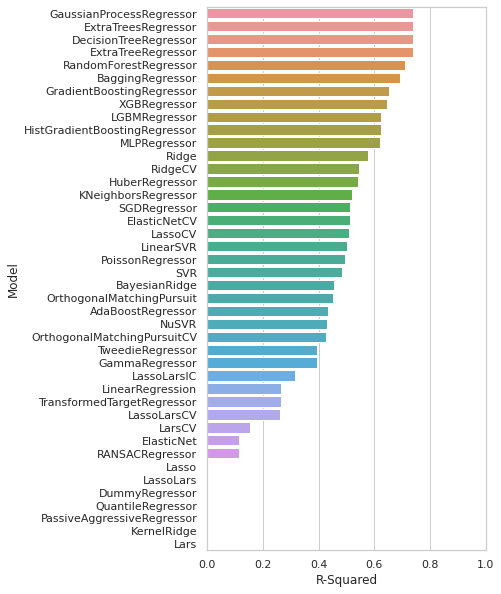

In [115]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))
plt.savefig('R-squared-train.pdf')

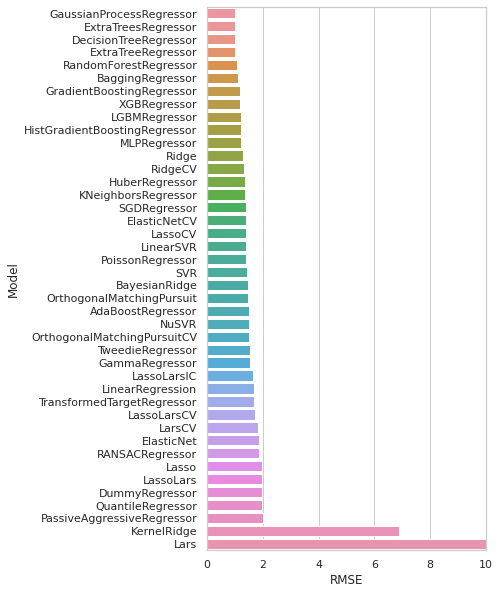

In [116]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))
plt.savefig('RMSE-train.pdf')

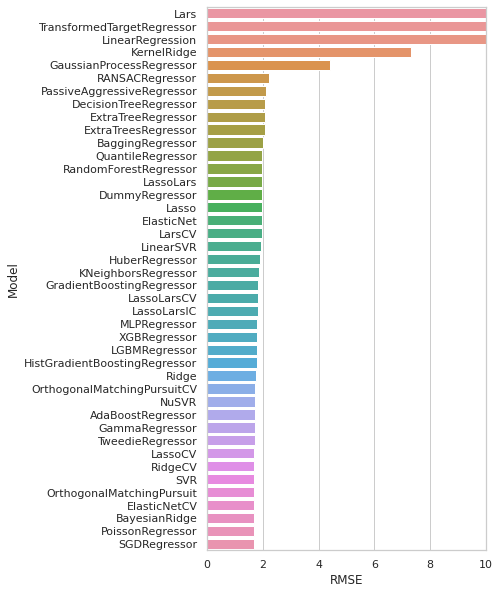

In [117]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="RMSE", data=predictions_test)
ax.set(xlim=(0, 10))
plt.savefig('RMSE-test.pdf')

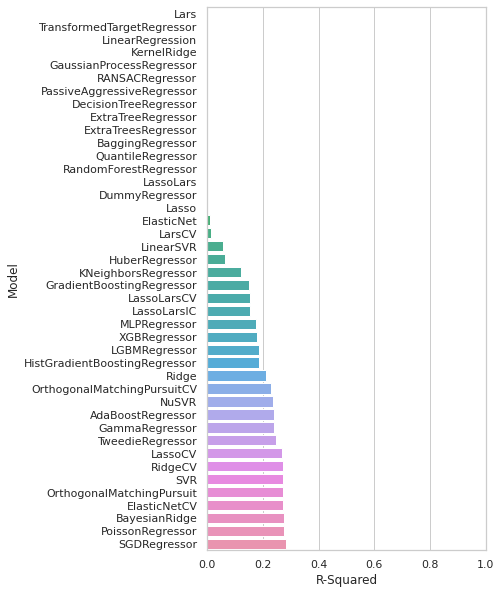

In [118]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test)
ax.set(xlim=(0, 1))
plt.savefig('R-squared-test.pdf')

# **Support vector regressor**

In [244]:
from sklearn.svm import SVR

In [245]:
from sklearn.metrics.pairwise import rbf_kernel,linear_kernel
#BUILDING A REGRESSION MODEL USING SUPPORT VECTOR REGRESSOR
import numpy as np
np.random.seed(200)
model = SVR(C=10, gamma=0.01, kernel=rbf_kernel)
model.fit(X_train, Y_train)

SVR(C=10, gamma=0.01, kernel=<function rbf_kernel at 0x7ff553269d40>)

In [246]:
Y_pred = model.predict(X_train)

In [203]:
from sklearn import metrics
print('R^2:',metrics.r2_score(Y_train, Y_pred))

R^2: 0.5120236639140275


In [204]:
print('Root Mean squared error:', metrics.mean_squared_error(Y_train, Y_pred,squared=False))

Root Mean squared error: 1.3891948078001937


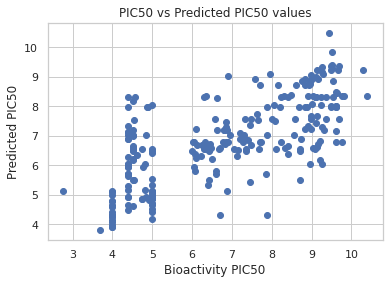

In [205]:
plt.scatter(Y_train, Y_pred)
plt.xlabel("Bioactivity PIC50")
plt.ylabel("Predicted PIC50")
plt.title("PIC50 vs Predicted PIC50 values")
plt.savefig('training-evaluation-bioactivity-SVR.pdf')
plt.show()

In [206]:
# Predicting Test data with the model
y_test_pred = model.predict(X_test)

In [207]:
acc_rf = metrics.r2_score(Y_test, y_test_pred)
print('R^2:', acc_rf)

R^2: 0.2348122827900444


In [208]:
print('Root Mean squared error:', metrics.mean_squared_error(Y_test, y_test_pred,squared=False))

Root Mean squared error: 1.7300159939073432


In [209]:
Y_test

103   6.92
339   9.54
246   8.87
258   9.26
355   7.30
      ... 
318   8.77
198   9.24
125   6.52
118   8.22
257   9.12
Name: pIC50, Length: 67, dtype: float64

In [210]:
for i in range(25):
  print(f'Actual Value {Y_test.iloc[i]} Predicted Value {y_test_pred[i]}')

Actual Value 6.920818753952375 Predicted Value 5.969646177897015
Actual Value 9.537602002101044 Predicted Value 6.587173277742548
Actual Value 8.872895201635192 Predicted Value 6.813867516909384
Actual Value 9.25649023527157 Predicted Value 8.426573424764811
Actual Value 7.301029995663981 Predicted Value 6.995946966745978
Actual Value 8.5016894462104 Predicted Value 8.341537126719947
Actual Value 4.3979400086720375 Predicted Value 6.050035614366163
Actual Value 8.51999305704285 Predicted Value 7.581532204569249
Actual Value 4.3979400086720375 Predicted Value 8.309782445456525
Actual Value 9.508638306165729 Predicted Value 8.54821186429172
Actual Value 6.022276394711152 Predicted Value 8.064764318136941
Actual Value 4.0 Predicted Value 4.265368698505058
Actual Value 6.142667503568731 Predicted Value 6.1197788892157865
Actual Value 8.521433504406156 Predicted Value 8.309782445456525
Actual Value 6.8696662315049934 Predicted Value 6.6018920337592055
Actual Value 9.378823718224965 Predicte

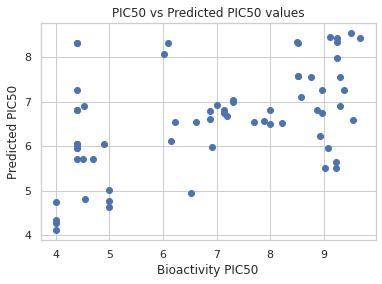

In [211]:
plt.scatter(Y_test, y_test_pred)
plt.xlabel("Bioactivity PIC50")
plt.ylabel("Predicted PIC50")
plt.title("PIC50 vs Predicted PIC50 values")
plt.savefig('testing-evaluation-bioactivity-SVR.pdf')
plt.show()

# **Cross Validation**

In [212]:
#Cross validation scores for SVR from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, 
                         X_train, 
                         Y_train, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)
tree_reg_rmse_scores = np.sqrt(-scores)

In [213]:
tree_reg_rmse_scores

array([1.95823446, 1.25564138, 1.64304697, 1.25253448, 1.55929261,
       1.86791577, 1.60083356, 1.92135348, 1.68484766, 1.31001494])

In [214]:
tree_reg_rmse_scores.mean()

1.6053715307340046

# **Hyperparamter tuning**

In [215]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3,return_train_score=True,
                           cv=10)

grid.fit(X_train, Y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.124, test=-0.011) total time=   0.0s
[CV 2/10] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.109, test=0.049) total time=   0.0s
[CV 3/10] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.113, test=0.044) total time=   0.0s
[CV 4/10] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.116, test=0.032) total time=   0.0s
[CV 5/10] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.118, test=0.015) total time=   0.0s
[CV 6/10] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.127, test=-0.006) total time=   0.0s
[CV 7/10] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.115, test=0.045) total time=   0.0s
[CV 8/10] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.113, test=-0.100) total time=   0.0s
[CV 9/10] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.119, test=-0.097) total time=   0.0s
[CV 10/10] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.106, test=-0.051) total time

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             return_train_score=True, verbose=3)

In [216]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

# **Performance metrics and visualization**

>4.5, 6.7 = 4.544
>9.0, 8.9 = 0.010
>9.0, 6.1 = 8.530
>9.0, 8.9 = 0.008
>5.0, 4.8 = 0.023
>8.9, 8.3 = 0.334
>4.4, 6.9 = 6.273
>7.1, 6.5 = 0.262
>7.9, 4.3 = 12.594
>4.0, 4.8 = 0.653
>9.8, 6.8 = 8.756
>4.0, 5.1 = 1.284
>4.0, 4.6 = 0.371
>6.4, 6.7 = 0.090
>6.7, 6.6 = 0.010
>6.2, 6.3 = 0.010
>4.5, 8.2 = 13.518
>6.0, 6.8 = 0.584
>9.4, 7.6 = 3.172
>4.9, 4.9 = 0.009
>9.6, 8.5 = 1.265
>4.4, 8.3 = 15.303
>5.0, 5.3 = 0.103
>6.2, 6.7 = 0.197
>8.6, 8.7 = 0.010


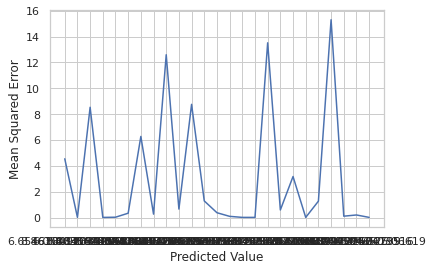

In [226]:
# calculate errors
errors = list()
for i in range(25):
	# calculate error
	err = (Y_train.iloc[i] - Y_pred[i])**2
	# store error
	errors.append(err)
	# report error
	print('>%.1f, %.1f = %.3f' % (Y_train.iloc[i], Y_pred[i], err))
# plot errors
plt.plot(errors)
plt.xticks(ticks=[i for i in range(len(errors))], labels=Y_pred)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.savefig('Mean-squared-error-curve.pdf')
plt.show()

In [232]:
# from google.colab import drive
# drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [240]:
!cp PIC50-Regression-Learning-Curve.pdf "/content/gdrive/My Drive/Colab Notebooks/reports"

>4.5, 6.7 = 2.132
>9.0, 8.9 = 0.100
>9.0, 6.1 = 2.921
>9.0, 8.9 = 0.088
>5.0, 4.8 = 0.152
>8.9, 8.3 = 0.578
>4.4, 6.9 = 2.505
>7.1, 6.5 = 0.512
>7.9, 4.3 = 3.549
>4.0, 4.8 = 0.808
>9.8, 6.8 = 2.959
>4.0, 5.1 = 1.133
>4.0, 4.6 = 0.609
>6.4, 6.7 = 0.301
>6.7, 6.6 = 0.100
>6.2, 6.3 = 0.100
>4.5, 8.2 = 3.677
>6.0, 6.8 = 0.764
>9.4, 7.6 = 1.781
>4.9, 4.9 = 0.094
>9.6, 8.5 = 1.125
>4.4, 8.3 = 3.912
>5.0, 5.3 = 0.321
>6.2, 6.7 = 0.444
>8.6, 8.7 = 0.100


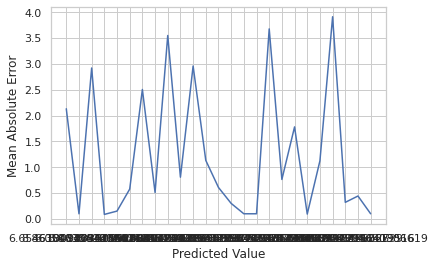

In [230]:
#Mean absolute error
errors = list()
for i in range(25):
	# calculate error
	err = abs((Y_train.iloc[i] - Y_pred[i]))
	# store error
	errors.append(err)
	# report error
	print('>%.1f, %.1f = %.3f' % (Y_train.iloc[i], Y_pred[i], err))
# plot errors
plt.plot(errors)
plt.xticks(ticks=[i for i in range(len(errors))], labels=Y_pred)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Absolute Error')
plt.savefig('Mean-absolute-error-curve.pdf')
plt.show()

# **Visualizations**

In [236]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 8.0 MB/s 
     |████████████████████████████████| 930 kB 31.6 MB/s 
     |████████████████████████████████| 1.1 MB 32.9 MB/s 


In [237]:
import scikitplot as skplt

# Learning **curve**

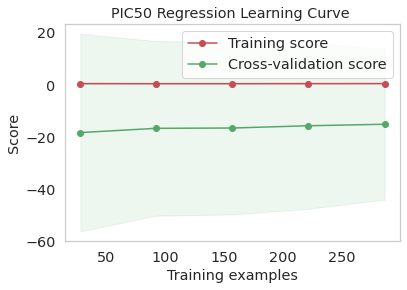

In [239]:
skplt.estimators.plot_learning_curve(SVR(), X, Y,
                                     cv=7, shuffle=True, scoring="r2", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="PIC50 Regression Learning Curve ");
plt.savefig('PIC50-Regression-Learning-Curve.pdf')
plt.show()